In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("/content/dataset2_l4.txt")
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [4]:
print("{} записів, {} полів".format(*df.shape))

8250 записів, 11 полів


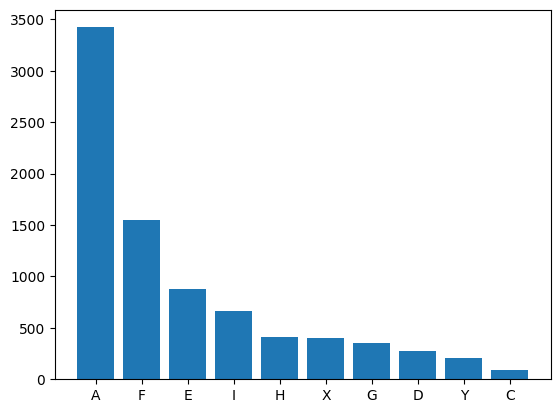

In [16]:
plt.bar(df['Class'].value_counts().index, df['Class'].value_counts())
plt.show()

In [103]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)

splits = list(ss.split(df))

print("Дисбаланс вибірок:")

for i, split in enumerate(splits):
  counts = df.iloc[split[0]]['Class'].value_counts()
  proportions = counts/counts.sum()
  disbalance = proportions.max()-proportions.min()
  print(i, round(disbalance, 3))

Дисбаланс вибірок:
0 0.412
1 0.407
2 0.402
3 0.402
4 0.407
5 0.409
6 0.403
7 0.404
8 0.399
9 0.399
10 0.407
11 0.405
12 0.401
13 0.407
14 0.401
15 0.406
16 0.406
17 0.408
18 0.407
19 0.409


In [104]:
train = df.iloc[splits[13][0]]
test = df.iloc[splits[13][1]]

X_train = train.drop(columns=['Class'])
y_train = train['Class']
X_test = test.drop(columns=['Class'])
y_test = test['Class']

In [53]:
# plt.bar(train['Class'].value_counts().index, df['Class'].value_counts())
# plt.show()

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# шукаємо найкращий параметр k

k_scores = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    print(f"k = {k}, avg_score = {round(scores.mean(), 3)}")

k = 1, avg_score = 0.701
k = 2, avg_score = 0.682
k = 3, avg_score = 0.688
k = 4, avg_score = 0.684
k = 5, avg_score = 0.679
k = 6, avg_score = 0.673
k = 7, avg_score = 0.666
k = 8, avg_score = 0.667
k = 9, avg_score = 0.665
k = 10, avg_score = 0.662
k = 11, avg_score = 0.659
k = 12, avg_score = 0.659
k = 13, avg_score = 0.655
k = 14, avg_score = 0.655
k = 15, avg_score = 0.651
k = 16, avg_score = 0.649
k = 17, avg_score = 0.643
k = 18, avg_score = 0.645
k = 19, avg_score = 0.638


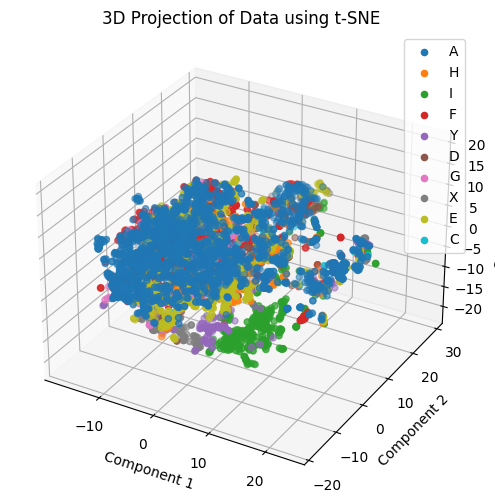

In [85]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
X_3d = tsne.fit_transform(X_train)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for label in y_train.unique():
    ax.scatter(X_3d[y_train == label][:, 0], X_3d[y_train == label][:, 1], X_3d[y_train == label][:, 2], label=label)
ax.set_title('3D Projection of Data using t-SNE')
ax.legend()
plt.show()

Classification Report for Training Data:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2416
           C       1.00      1.00      1.00        67
           D       1.00      1.00      1.00       203
           E       1.00      1.00      1.00       591
           F       1.00      1.00      1.00      1061
           G       1.00      1.00      1.00       249
           H       1.00      1.00      1.00       276
           I       1.00      1.00      1.00       469
           X       1.00      1.00      1.00       292
           Y       1.00      1.00      1.00       151

    accuracy                           1.00      5775
   macro avg       1.00      1.00      1.00      5775
weighted avg       1.00      1.00      1.00      5775

Classification Report for Test Data:
              precision    recall  f1-score   support

           A       0.75      0.77      0.76      1006
           C       0.55      0.60      0.57        20


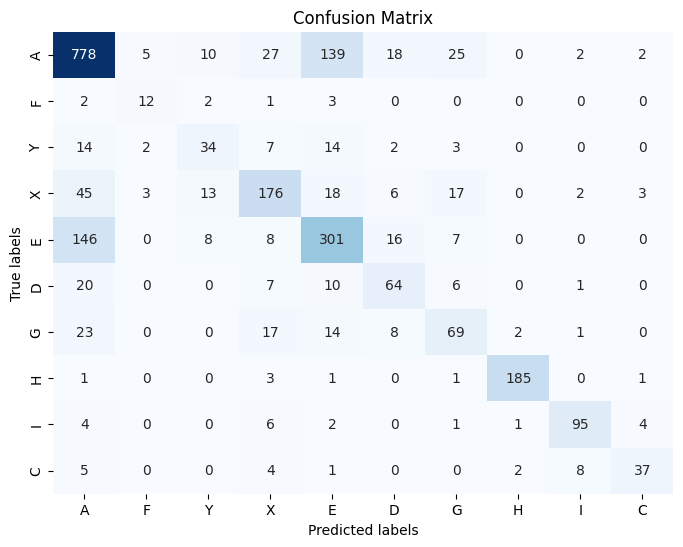

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

train_pred = knn.predict(X_train)
print("Classification Report for Training Data:")
print(classification_report(y_train, train_pred, zero_division=0))

test_pred = knn.predict(X_test)
print("Classification Report for Test Data:")
print(classification_report(y_test, test_pred, zero_division=0))

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(8, 6))
class_labels = y_train.unique()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

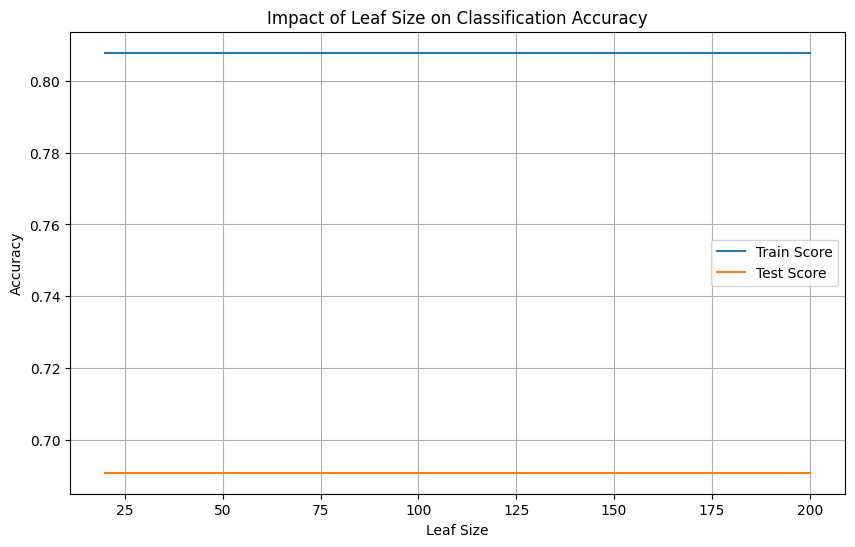

In [107]:
leaf_sizes = np.arange(20, 201, 5)

train_scores = []
test_scores = []

for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=leaf_size)

    knn.fit(X_train, y_train)

    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(10, 6))
plt.plot(leaf_sizes, train_scores, label='Train Score')
plt.plot(leaf_sizes, test_scores, label='Test Score')
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.title('Impact of Leaf Size on Classification Accuracy')
plt.legend()
plt.grid(True)
plt.show()